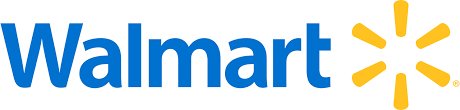

## <b>Importing Libraries<b>
    

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## <b>Uploading Dataset<b>

In [2]:
sales_data = pd.read_csv('WALMART_SALES_DATA.csv')

## <b>Exploratory Data Analysis (EDA)<b>

In [3]:
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
sales_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### <b> Checking the type of the 'Date' column<b>

In [6]:
sales_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

#### <b> Converting 'Date' column to Datetime format <b>

In [8]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [9]:
sales_data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [10]:
sales_data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [11]:
sales_data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

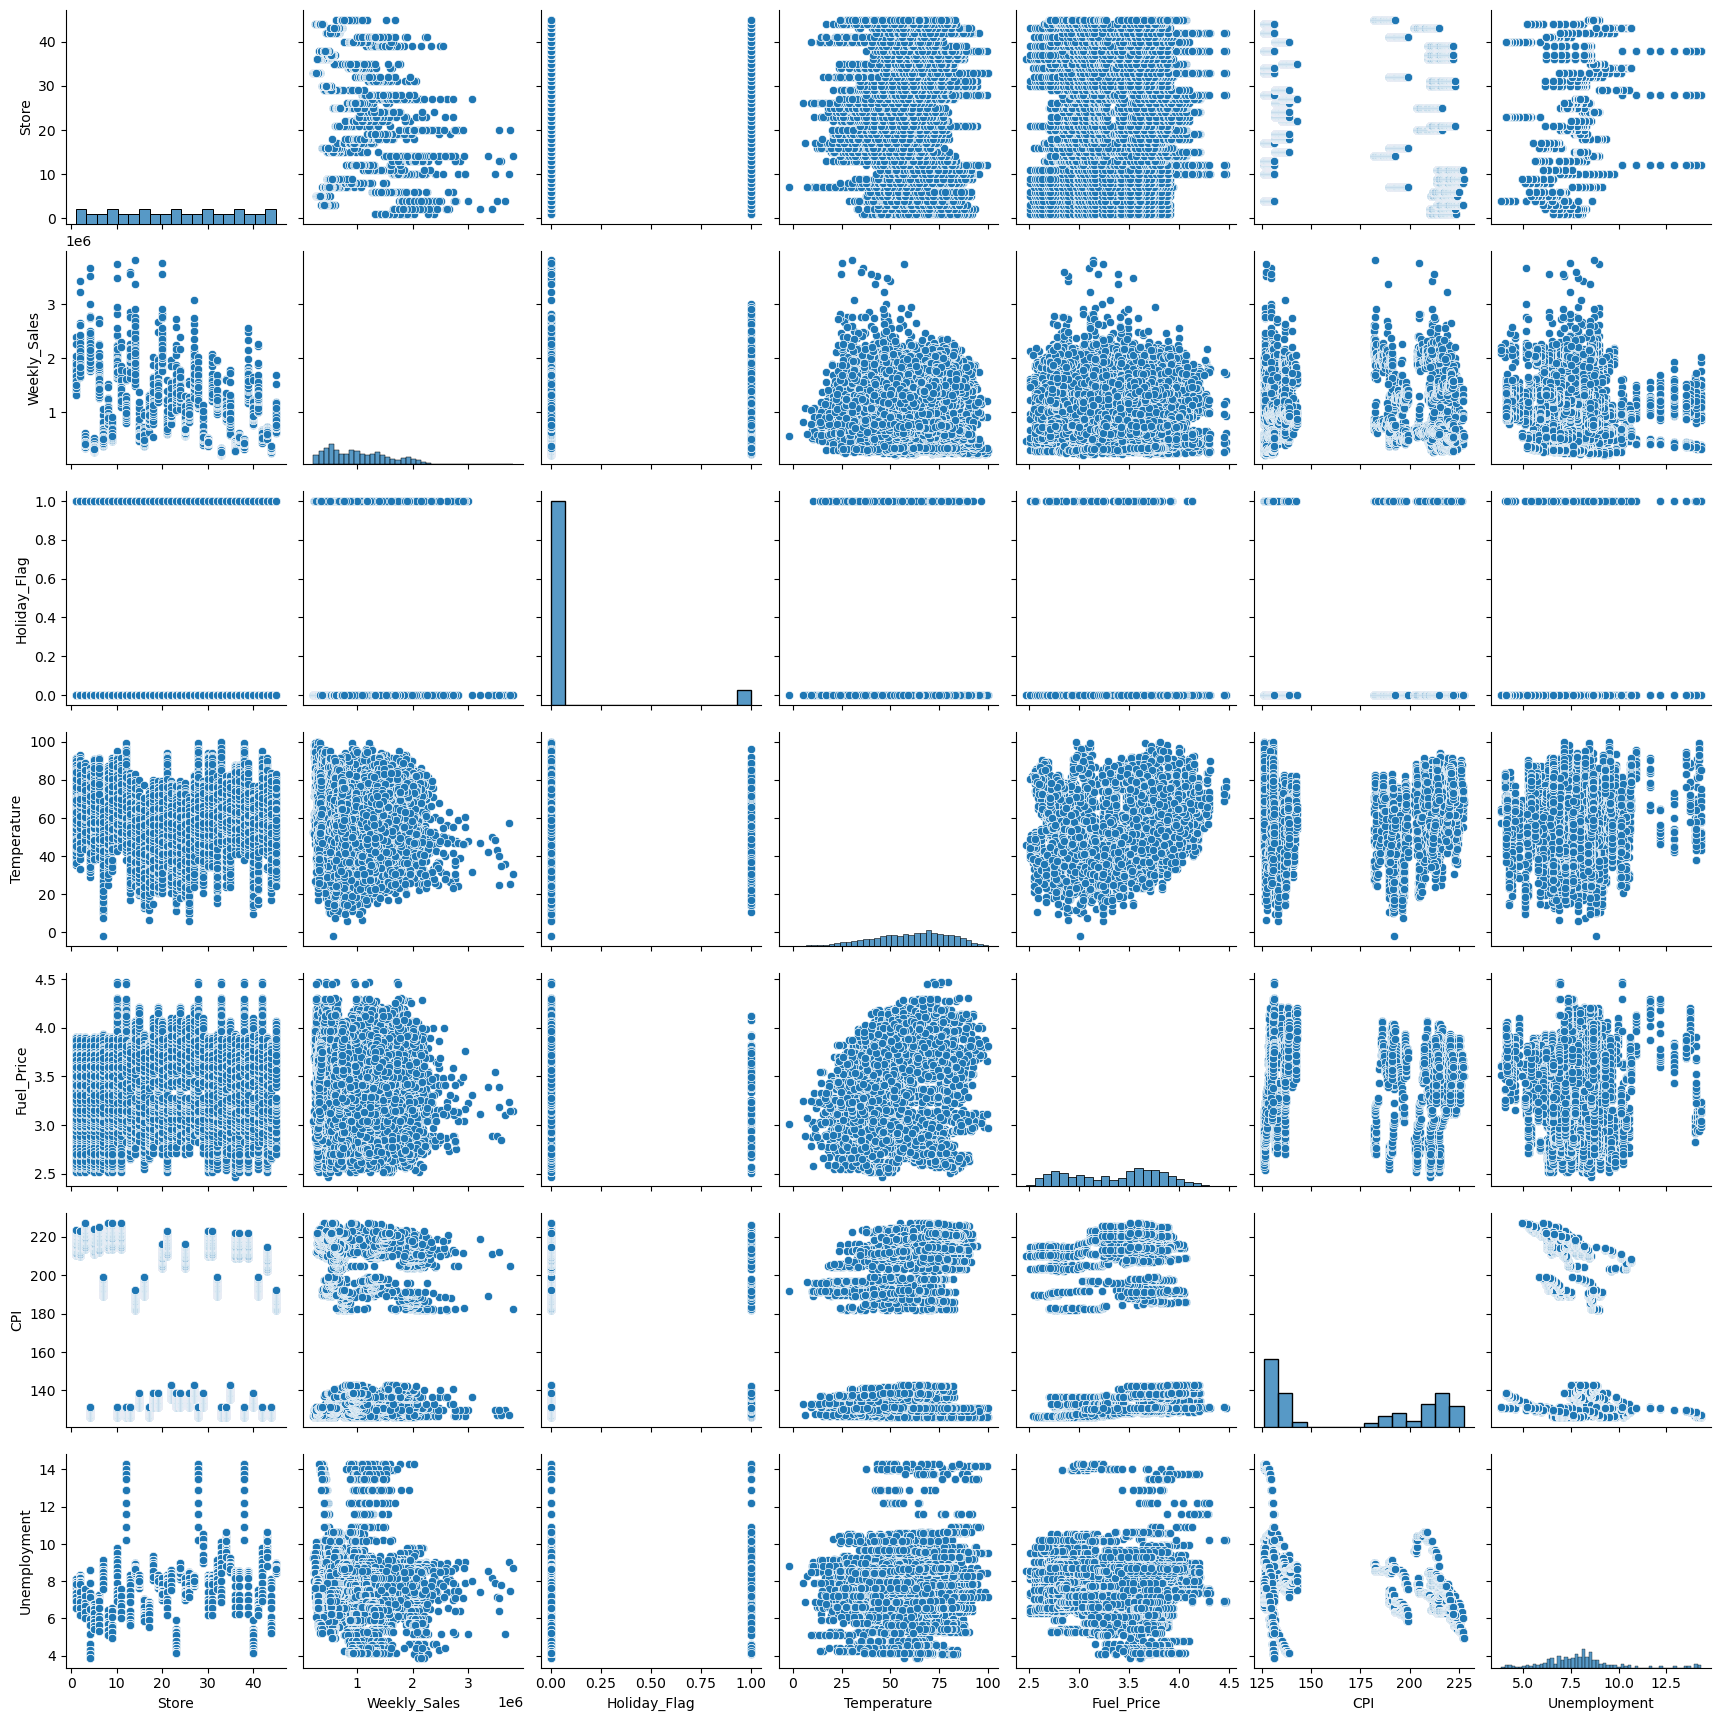

In [12]:
sns.pairplot(data= sales_data)

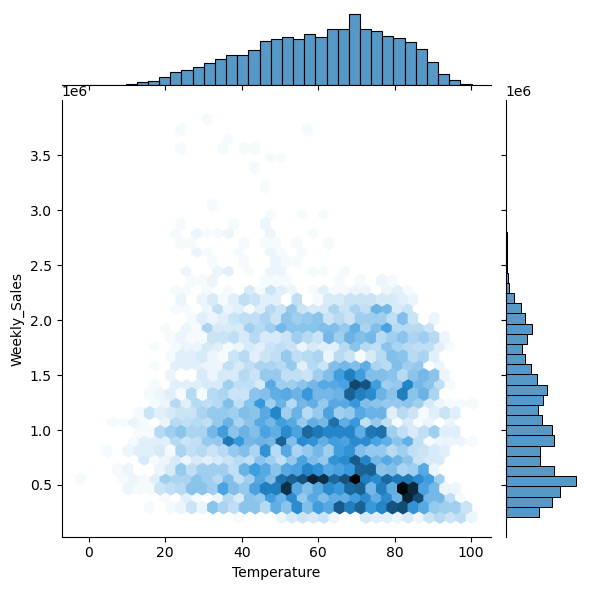

In [13]:
sns.jointplot(x='Temperature', y='Weekly_Sales',kind='hex',data= sales_data)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

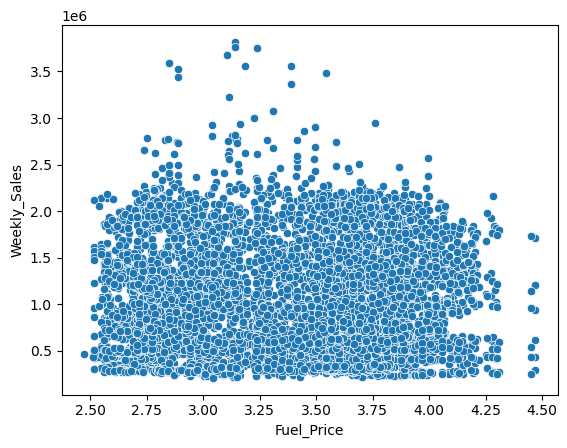

In [14]:
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales',data= sales_data)

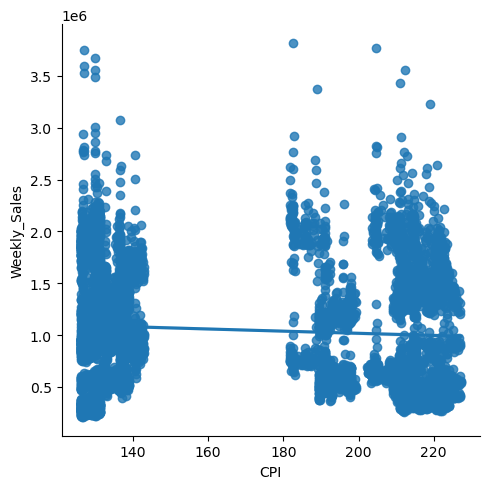

In [15]:
sns.lmplot(x='CPI', y='Weekly_Sales',data= sales_data)

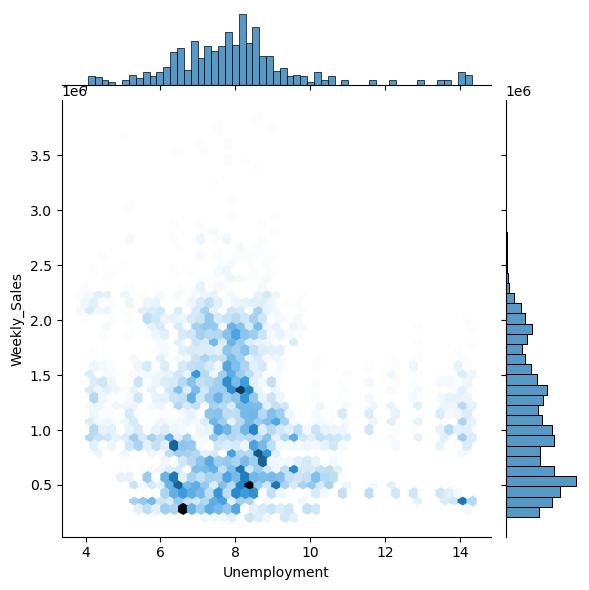

In [16]:
sns.jointplot(x='Unemployment', y='Weekly_Sales',kind='hex',data= sales_data)

#### <b>Checking for missing values in the dataset<b>

In [17]:
sales_data.isna().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

EDA of this dataset shows no direct correlation between the explanatory variables and the dependant variable (Weekly_Sales)

Cleaning the data further to explore plausible trends and correlation between factors and answering key insightful questions 

### Re-arranging the dataset 

In [18]:
sales_data = sales_data.iloc[:, [0,1,3,4,5,6,7,2]]

In [19]:
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53


#### <b> Which store has the maximum sales?<b>

In [20]:
sum_of_sales = sales_data.groupby('Store').sum('Weekly_Sales').round()

In [21]:
sum_of_sales.sort_values('Weekly_Sales', ascending =False).head(1)

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
Store,,,,,,
20,10,7930.0,489.0,29892.0,1054.0,301397792.0


In [22]:
sum_of_sales.sort_values('Weekly_Sales', ascending =True).head(1)

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
Store,,,,,,
33,10,10972.0,511.0,18401.0,1220.0,37160222.0


Thus, store 20 has the maximum sales with 301,397,792 dollars and store 33 has the minimum sales with 37,160,222 dollars

#### <b>Which store has maximum standard deviation i.e., the sales vary a lot? <b>


In [23]:
sales_data.groupby('Store').std().sort_values('Weekly_Sales', ascending= False).head(1)

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
Store,,,,,,
14,0.255926,16.271612,0.443029,3.59482,0.15146,317569.949476


#### Also, find out the coefficient of mean to standard deviation<b>

In [24]:
#FOR Store 14, the coefficient of variation is given by the formula : C.V = (Std/mean)*100

In [25]:
store_14 = sales_data[sales_data['Store'] ==14]['Weekly_Sales']
store_14

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

In [26]:
CV = store_14.std()/ store_14.mean()*100

In [27]:
CV

15.713673600948338

#### Which store/s has good quarterly growth rate in Q3’2012?




In [28]:
sales_data['Day'] = pd.DatetimeIndex(sales_data['Date']).day
sales_data['Month'] = pd.DatetimeIndex(sales_data['Date']).month
sales_data['Year'] = pd.DatetimeIndex(sales_data['Date']).year

/var/folders/p_/d57tpnkj54l60xy2z6dzdd400000gn/T/ipykernel_1535/2649149850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Day'] = pd.DatetimeIndex(sales_data['Date']).day
/var/folders/p_/d57tpnkj54l60xy2z6dzdd400000gn/T/ipykernel_1535/2649149850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Month'] = pd.DatetimeIndex(sales_data['Date']).month
/var/folders/p_/d57tpnkj54l60xy2z6dzdd400000gn/T/ipykernel_1535/2649149850.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [29]:
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90,2,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44,2,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17,19,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59,26,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95,28,9,2012
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07,10,5,2012
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36,10,12,2012
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53,19,10,2012


In [30]:
a_Q3= sales_data[(sales_data['Date'] >= '2012-07-01') & (sales_data['Date'] <= '2012-09-30')]
sales_Q3 = a_Q3.groupby('Store')['Weekly_Sales'].sum().round()
sales_Q3

Store
1     18633210.0
2     22396868.0
3      4966496.0
4     25652119.0
5      3880622.0
6     18341221.0
7      7322394.0
8     10873860.0
9      6528240.0
10    21169356.0
11    16094363.0
12    11777508.0
13    24319994.0
14    20140430.0
15     6909374.0
16     6441311.0
17    11533998.0
18    12507522.0
19    16644341.0
20    24665938.0
21     8403508.0
22    11818544.0
23    17103654.0
24    16126000.0
25     8309440.0
26    12417575.0
27    20191238.0
28    15055660.0
29     6127862.0
30     5181974.0
31    16454328.0
32    14142165.0
33     3177072.0
34    11476259.0
35    10252123.0
36     3578124.0
37     6250524.0
38     5129298.0
39    18899955.0
40    11647661.0
41    16373588.0
42     6830840.0
43     7376726.0
44     4020486.0
45     8851242.0
Name: Weekly_Sales, dtype: float64

In [31]:
a_Q2= sales_data[(sales_data['Date'] >= '2012-04-01') & (sales_data['Date'] <= '2012-06-30')]
sales_Q2 = a_Q2.groupby('Store')['Weekly_Sales'].sum().round()
sales_Q2

Store
1     21036966.0
2     25085124.0
3      5562668.0
4     28384185.0
5      4427262.0
6     20728970.0
7      7613594.0
8     11934276.0
9      7431320.0
10    23598434.0
11    17879096.0
12    13193365.0
13    26803226.0
14    24427769.0
15     7867952.0
16     6626133.0
17    12918892.0
18    13834706.0
19    18315279.0
20    27550181.0
21     9226280.0
22    13329065.0
23    18283425.0
24    17768192.0
25     9247467.0
26    13218290.0
27    22593641.0
28    16986000.0
29     7034493.0
30     5786335.0
31    18249155.0
32    15415236.0
33     3512138.0
34    12858028.0
35    10753571.0
36     4090379.0
37     6859778.0
38     5732363.0
39    20191586.0
40    12849747.0
41    17560036.0
42     7608247.0
43     8239793.0
44     4322555.0
45    10278900.0
Name: Weekly_Sales, dtype: float64

In [32]:
Diff_in_sales = sales_Q3-sales_Q2

In [33]:
Growth_rate = Diff_in_sales/ sales_Q3*100

In [34]:
Growth_rate.sort_values(ascending=False).head()

Store
16   -2.869323
7    -3.976841
35   -4.891163
26   -6.448240
39   -6.834043
Name: Weekly_Sales, dtype: float64

All the stores have a negative growth rate and thus none on the stores have a good quarterly growth rate

#### Some holidays have a negative impact on sales. 
#### Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [35]:
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90,2,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44,2,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17,19,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59,26,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95,28,9,2012
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07,10,5,2012
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36,10,12,2012
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53,19,10,2012


In [36]:
#the holidays are as follows 
Super_bowl = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
Labour_day = ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']

In [37]:
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90,2,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44,2,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17,19,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59,26,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95,28,9,2012
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07,10,5,2012
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36,10,12,2012
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53,19,10,2012


In [39]:
# To find the mean sales of holiday events using Date.isin formula 
super_bowl_sales = sales_data[sales_data.Date.isin(Super_bowl)]['Weekly_Sales'].mean()
labour_day_sales = sales_data[sales_data.Date.isin(Labour_day)]['Weekly_Sales'].mean()
thanksgiving_sales = sales_data[sales_data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean()
christmas_sales = sales_data[sales_data.Date.isin(Christmas)]['Weekly_Sales'].mean()

In [40]:
super_bowl_sales

1079127.9877037033

In [41]:
labour_day_sales

1042427.2939259257

In [42]:
thanksgiving_sales

1471273.427777778

In [43]:
christmas_sales

960833.1115555551

#### To find the mean sales in non-holiday season for all stores together.

In [44]:
 non_holiday_sales = sales_data[sales_data['Holiday_Flag']==0]['Weekly_Sales'].mean()

In [45]:
non_holiday_sales

1041256.3802088564

#### Comparing holiday season sales with the mean sales on non-holiday season 

In [46]:
non_holiday_sales < super_bowl_sales

True

In [47]:
non_holiday_sales < labour_day_sales

True

In [48]:
non_holiday_sales < thanksgiving_sales

True

In [49]:
non_holiday_sales < christmas_sales

False

Thus, holidays during Super bowl, Labor day and Thanksgiving have a postive impact on sales. Holiday during christmas has a negative impact on sales and is lower than the mean sales during non-holidays.


#### Provide a monthly and semester view of sales in units and give insights

In [50]:
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90,2,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44,2,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17,19,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59,26,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95,28,9,2012
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07,10,5,2012
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36,10,12,2012
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53,19,10,2012


In [51]:
sales_data['Year'].unique()

array([2010, 2011, 2012])

### Monthly sales for year 2010 

In [52]:
ms_2010= sales_data[sales_data['Year']== 2010].groupby('Month').mean('Weekly_Sales').round()
ms_2010

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Year
Month,,,,,,,,,
1,23.0,0.0,70.0,3.0,168.0,8.0,938664.0,10.0,2010.0
2,23.0,0.0,52.0,3.0,168.0,9.0,1064372.0,14.0,2010.0
3,23.0,0.0,54.0,3.0,168.0,9.0,1034590.0,16.0,2010.0
4,23.0,0.0,62.0,3.0,168.0,8.0,1021177.0,19.0,2010.0
5,23.0,0.0,54.0,3.0,168.0,9.0,1039303.0,13.0,2010.0
6,23.0,0.0,77.0,3.0,168.0,8.0,1055082.0,17.0,2010.0
7,23.0,0.0,76.0,3.0,168.0,8.0,1023702.0,18.0,2010.0
8,23.0,0.0,74.0,3.0,168.0,8.0,1025212.0,18.0,2010.0
9,23.0,0.0,70.0,3.0,168.0,8.0,998356.0,13.0,2010.0


In [53]:
ms_2010.reset_index()

,Month,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Year
0,1,23.0,0.0,70.0,3.0,168.0,8.0,938664.0,10.0,2010.0
1,2,23.0,0.0,52.0,3.0,168.0,9.0,1064372.0,14.0,2010.0
2,3,23.0,0.0,54.0,3.0,168.0,9.0,1034590.0,16.0,2010.0
3,4,23.0,0.0,62.0,3.0,168.0,8.0,1021177.0,19.0,2010.0
4,5,23.0,0.0,54.0,3.0,168.0,9.0,1039303.0,13.0,2010.0
5,6,23.0,0.0,77.0,3.0,168.0,8.0,1055082.0,17.0,2010.0
6,7,23.0,0.0,76.0,3.0,168.0,8.0,1023702.0,18.0,2010.0
7,8,23.0,0.0,74.0,3.0,168.0,8.0,1025212.0,18.0,2010.0
8,9,23.0,0.0,70.0,3.0,168.0,8.0,998356.0,13.0,2010.0
9,10,23.0,0.0,58.0,3.0,168.0,8.0,1027201.0,17.0,2010.0


Text(0.5, 1.0, 'Month-wise sales of  2010')

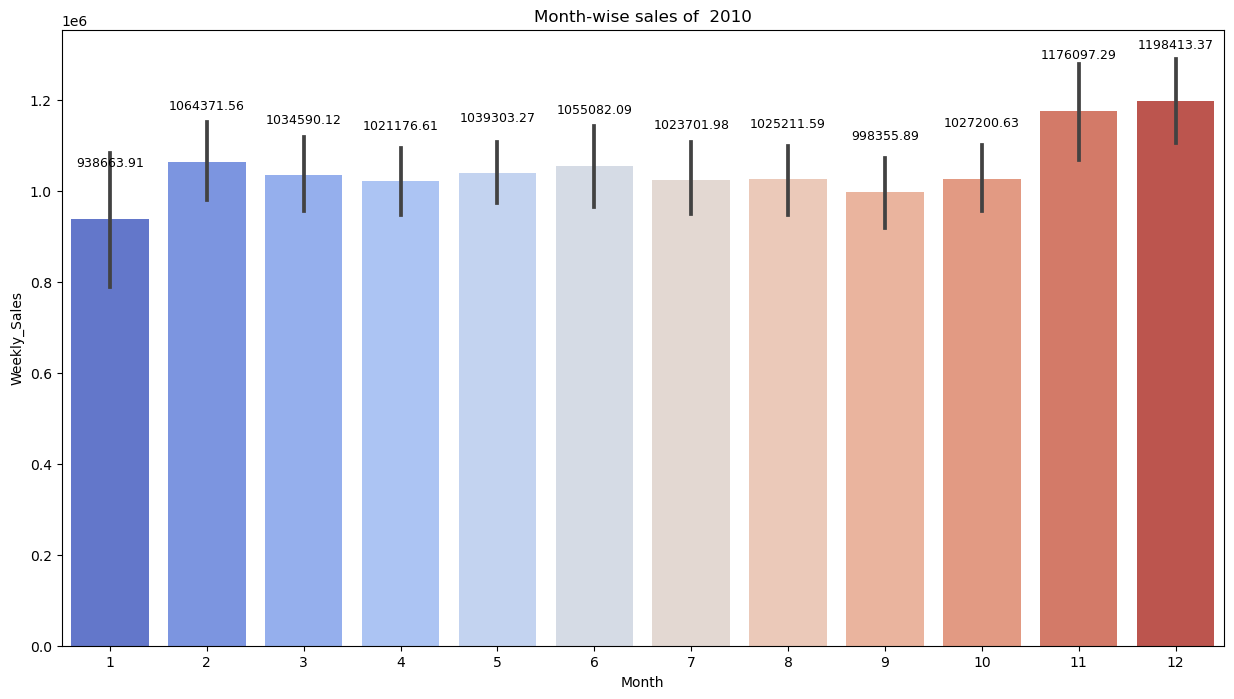

In [54]:
plt.figure(figsize=(15, 8))
graph_2010 = sns.barplot(x= sales_data[sales_data['Year']== 2010]['Month'],
                         y = sales_data[sales_data['Year']== 2010]['Weekly_Sales'], data = sales_data, palette='coolwarm')

for bar in graph_2010.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  graph_2010.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 40),
                   textcoords='offset points')
plt.title('Month-wise sales of  2010')
 

### Monthly sales for year 2011

In [55]:
ms_2011 = sales_data[sales_data['Year']== 2011].groupby('Month').mean('Weekly_Sales').round()
ms_2011

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Year
Month,,,,,,,,,
1,23.0,0.0,46.0,3.0,170.0,8.0,942070.0,15.0,2011.0
2,23.0,0.0,54.0,3.0,171.0,8.0,1042273.0,16.0,2011.0
3,23.0,0.0,59.0,4.0,171.0,8.0,1011263.0,16.0,2011.0
4,23.0,0.0,50.0,4.0,171.0,8.0,1033220.0,14.0,2011.0
5,23.0,0.0,70.0,4.0,171.0,8.0,1015565.0,17.0,2011.0
6,23.0,0.0,70.0,4.0,171.0,8.0,1038471.0,15.0,2011.0
7,23.0,0.0,68.0,4.0,171.0,8.0,997605.0,15.0,2011.0
8,23.0,0.0,74.0,4.0,172.0,8.0,1044895.0,14.0,2011.0
9,23.0,0.0,65.0,4.0,173.0,8.0,1026810.0,18.0,2011.0


Text(0.5, 1.0, 'Month-wise sales of  2011')

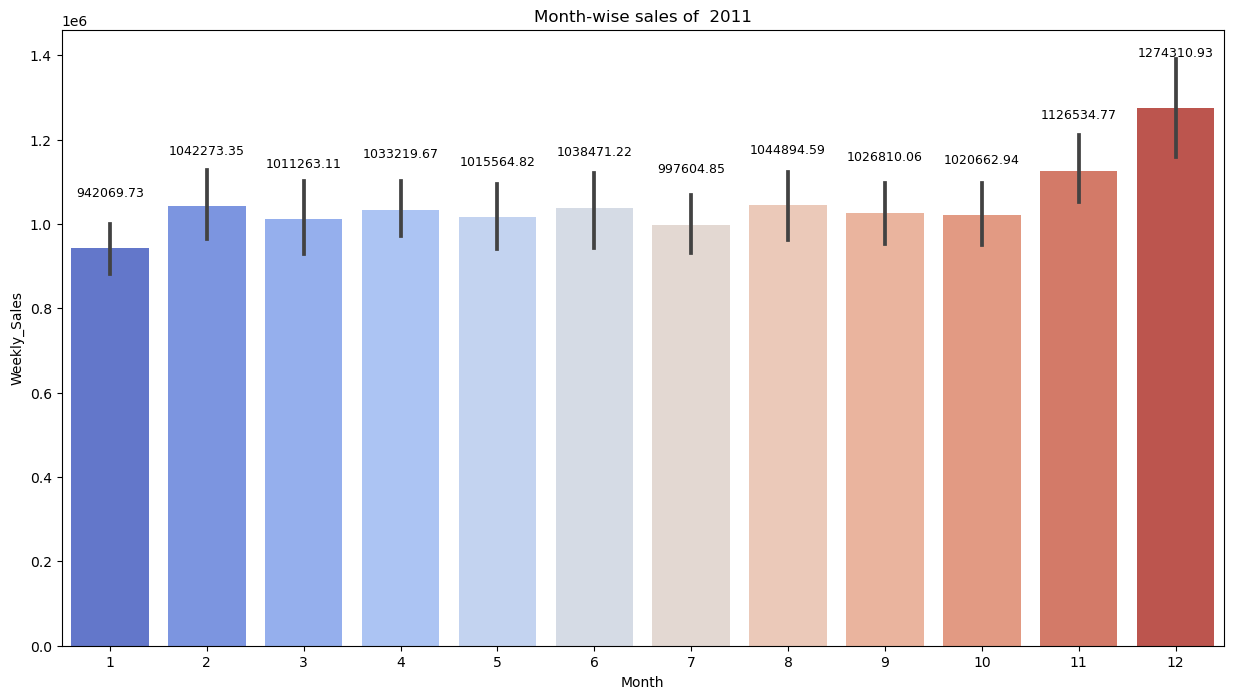

In [56]:
plt.figure(figsize=(15, 8))
graph_2011 = sns.barplot(x= sales_data[sales_data['Year']== 2011]['Month'],
                         y = sales_data[sales_data['Year']== 2011]['Weekly_Sales'], data = sales_data, palette='coolwarm')

for bar in graph_2011.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  graph_2011.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 40),
                   textcoords='offset points')
plt.title('Month-wise sales of  2011')

### Monthly sales for year 2012

In [57]:
ms_2012 = sales_data[sales_data['Year']== 2012].groupby('Month').mean('Weekly_Sales').round()
ms_2012

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Year
Month,,,,,,,,,
1,23.0,0.0,49.0,3.0,175.0,7.0,956782.0,16.0,2012.0
2,23.0,0.0,44.0,4.0,175.0,8.0,1057997.0,15.0,2012.0
3,23.0,0.0,59.0,4.0,175.0,7.0,1025510.0,16.0,2012.0
4,23.0,0.0,62.0,4.0,176.0,7.0,1014127.0,16.0,2012.0
5,23.0,0.0,68.0,4.0,176.0,7.0,1053948.0,18.0,2012.0
6,23.0,0.0,69.0,4.0,175.0,7.0,1082920.0,13.0,2012.0
7,23.0,0.0,79.0,4.0,176.0,7.0,1025480.0,17.0,2012.0
8,23.0,0.0,76.0,4.0,176.0,7.0,1064514.0,20.0,2012.0
9,23.0,0.0,64.0,4.0,176.0,7.0,998866.0,16.0,2012.0


Text(0.5, 1.0, 'Month-wise sales of  2012')

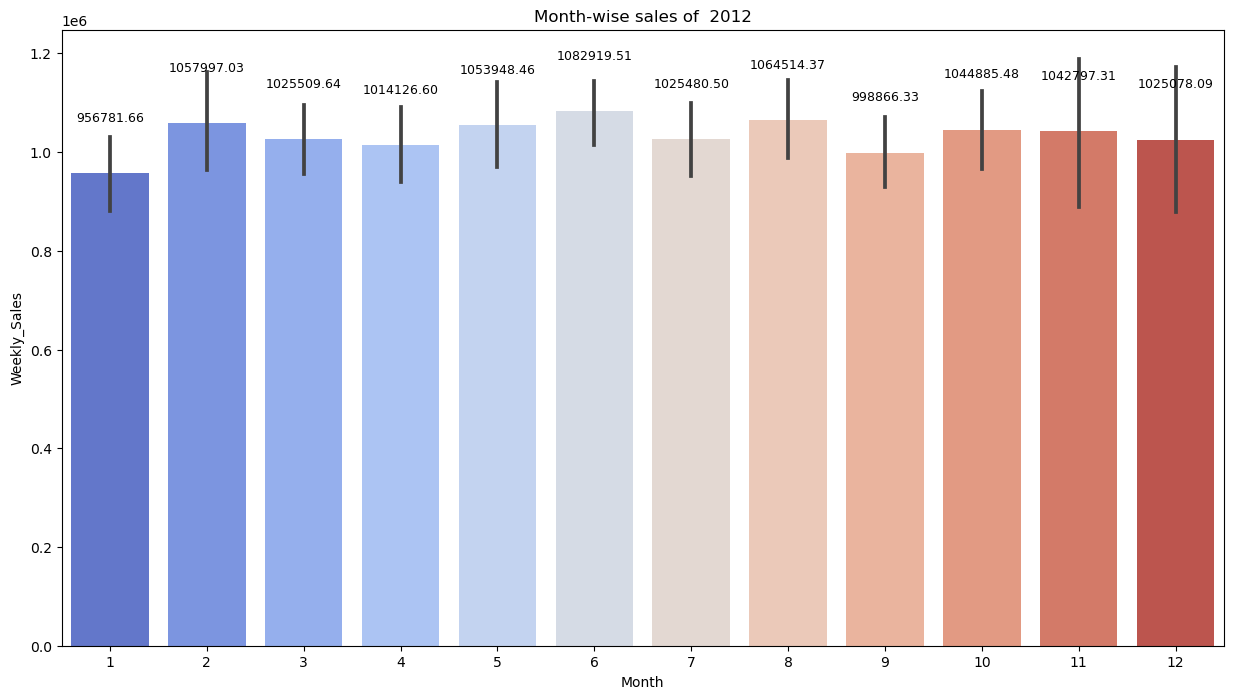

In [58]:
plt.figure(figsize=(15, 8))
graph_2012 = sns.barplot(x= sales_data[sales_data['Year']== 2012]['Month'],
                         y = sales_data[sales_data['Year']== 2012]['Weekly_Sales'], data = sales_data, palette='coolwarm')

for bar in graph_2012.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  graph_2012.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width()/2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 40),
                   textcoords='offset points')
    
plt.title('Month-wise sales of  2012')

#### Yearly sales

In [59]:
yearly_sales = sales_data.groupby('Year').sum('Weekly_Sales').round()
yearly_sales

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month
Year,,,,,,,,,
2010,49680,180,130177.0,6099.0,363100.0,18344.0,2.288886e+09,34155,15120
2011,53820,180,137589.0,8335.0,401417.0,18912.0,2.448200e+09,36495,15255
2012,44505,90,122606.0,7178.0,339590.0,14218.0,2.000133e+09,30060,11295


Text(0.5, 1.0, 'Yearly Sales')

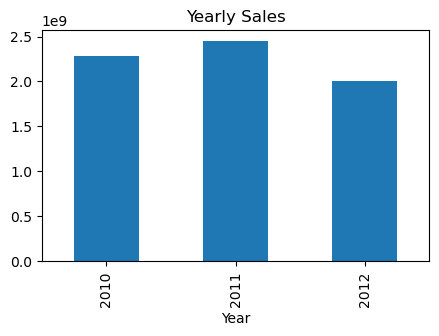

In [60]:
plt.figure(figsize=(5, 3))
yearly_sales['Weekly_Sales'].plot(kind='bar') 

plt.title('Yearly Sales')


In [61]:
monthly_sales = sales_data.groupby('Month').mean().round()
monthly_sales.sort_values('Weekly_Sales', ascending=False)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Year
Month,,,,,,,,,
12,23.0,0.0,46.0,3.0,171.0,8.0,1210255.0,16.0,2011.0
11,23.0,0.0,52.0,3.0,171.0,8.0,1133751.0,13.0,2011.0
6,23.0,0.0,71.0,3.0,173.0,8.0,1064848.0,15.0,2011.0
2,23.0,0.0,50.0,3.0,171.0,8.0,1054597.0,15.0,2011.0
8,23.0,0.0,75.0,3.0,172.0,8.0,1044874.0,17.0,2011.0
5,23.0,0.0,62.0,3.0,171.0,8.0,1035379.0,15.0,2011.0
10,23.0,0.0,61.0,3.0,172.0,8.0,1030631.0,16.0,2011.0
3,23.0,0.0,57.0,3.0,172.0,8.0,1024975.0,16.0,2011.0
4,23.0,0.0,57.0,3.0,171.0,8.0,1024324.0,16.0,2011.0


Text(0.5, 1.0, 'Monthly Sales')

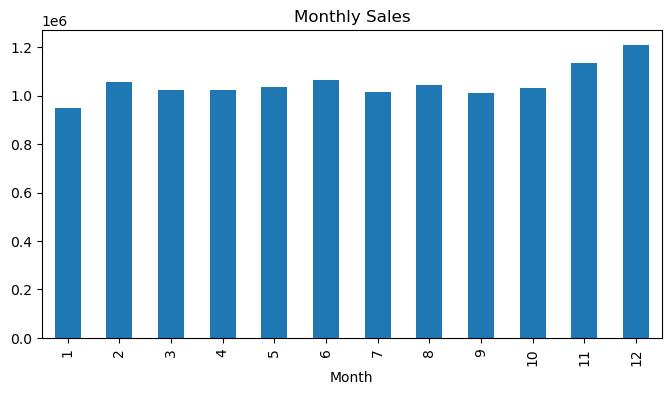

In [62]:
plt.figure(figsize=(8, 4))
monthly_sales['Weekly_Sales'].plot(kind='bar',) 

plt.title('Monthly Sales')


### Insights from the data analyzed 

1. Year 2011 has the highest weekly sales across all 3 years
2. The month of December has the highest weekly sales on average across 3 years 

<b>Before modeling, we check for outliers in the data and exclude them, if any. For that, we graph some boxplots for various variables in the dataset like Temperature, Fuel_Price, CPI, Unemployment<b>

<AxesSubplot:xlabel='Temperature'>

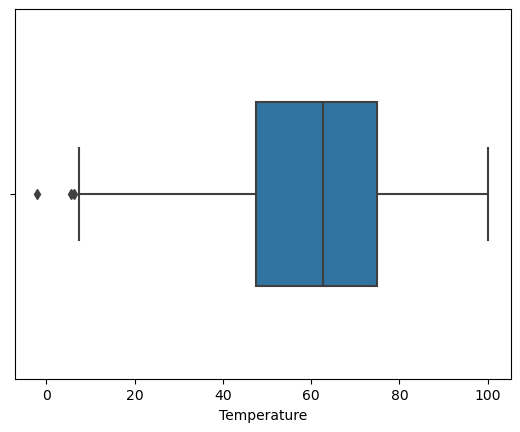

In [63]:
#Temperature outlier check 
sns.boxplot(x='Temperature', data=sales_data,width=0.5 )

Here, the outliers are below 10 

<AxesSubplot:xlabel='Fuel_Price'>

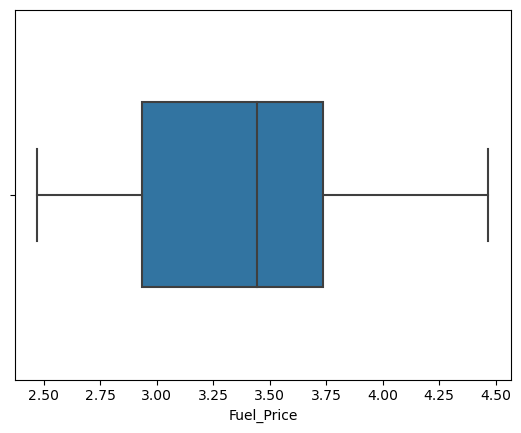

In [64]:
#Fuel_Price outlier check 
sns.boxplot(x='Fuel_Price', data=sales_data,width=0.5 )

<AxesSubplot:xlabel='CPI'>

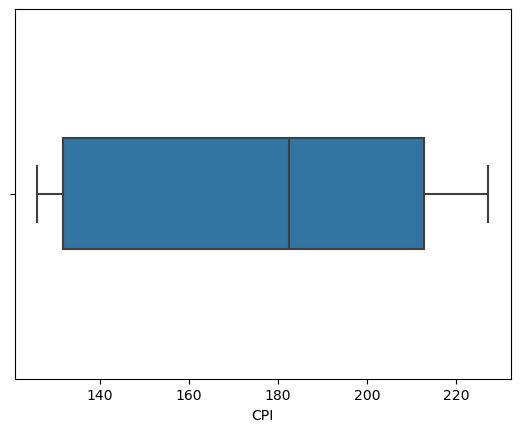

In [65]:
#CPI outlier check 
sns.boxplot(x='CPI', data=sales_data,width=0.3 )

<AxesSubplot:xlabel='Unemployment'>

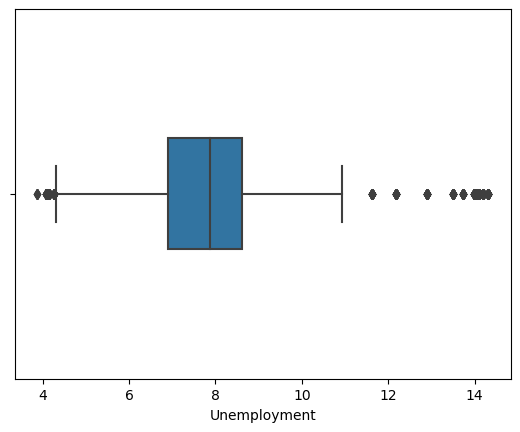

In [66]:
#Unemployment outlier check 
sns.boxplot(x='Unemployment', data=sales_data,width=0.3 )

The outliers in unemployment occur below 4.5 and after 10

## Adjusting for these outliers before modeling the dataset 

In [67]:
sales_data= sales_data[(sales_data['Temperature']>10) & (sales_data['Unemployment']>4.5 ) & (sales_data['Unemployment']<10)]
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90,2,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44,2,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17,19,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59,26,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95,28,9,2012
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07,10,5,2012
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36,10,12,2012
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53,19,10,2012


# Modeling 

### Linear Regression Model 

In [68]:
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90,2,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44,2,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17,19,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59,26,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95,28,9,2012
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07,10,5,2012
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36,10,12,2012
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53,19,10,2012


 ### Checking again for outliers now

<AxesSubplot:xlabel='Temperature'>

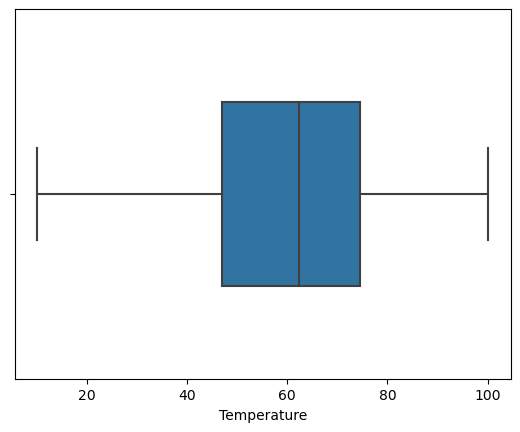

In [69]:
#Temperature outlier check 
sns.boxplot(x='Temperature', data=sales_data,width=0.5 )

<AxesSubplot:xlabel='Unemployment'>

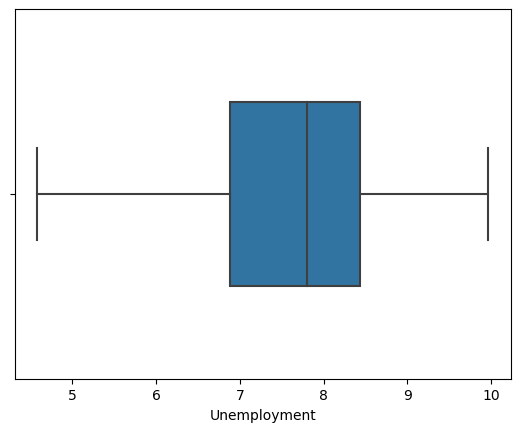

In [70]:
#Unemployment outlier check 
sns.boxplot(x='Unemployment', data=sales_data,width=0.5 )

In [71]:
#No more outliers exist and data is clean to be modeled. 

In [72]:
X= sales_data.iloc[:,[0,4,5,6,8,9,10]] #explanatory variables
y= sales_data.iloc[:,7] # dependent variable
X


,Store,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2.572,211.096358,8.106,2,5,2010
1,1,2.548,211.242170,8.106,2,12,2010
2,1,2.514,211.289143,8.106,19,2,2010
3,1,2.561,211.319643,8.106,26,2,2010
4,1,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...
6430,45,3.997,192.013558,8.684,28,9,2012
6431,45,3.985,192.170412,8.667,10,5,2012
6432,45,4.000,192.327265,8.667,10,12,2012
6433,45,3.969,192.330854,8.667,19,10,2012


In [73]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 5658, dtype: float64

In [74]:
#importing relevant libraries and splitting the data into training and test set

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
#Feature scaling the variables in the test set 

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()

In [80]:
X_train= sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
#predicting the test results

In [85]:
y_pred = lr.predict(X_test)

In [86]:
#comparing the predicted weeklly sales (y_pred) to the actual weekly sales(y_test)

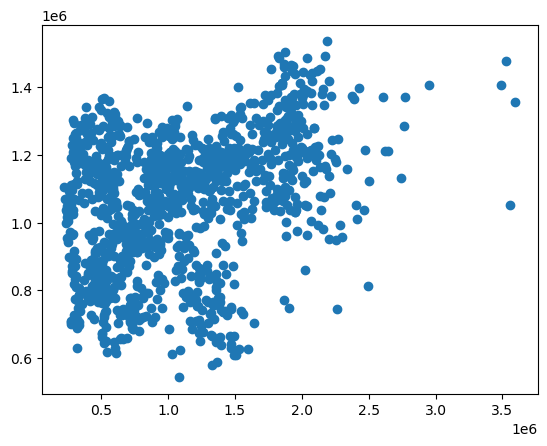

In [87]:
plt.scatter(y_test, y_pred)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

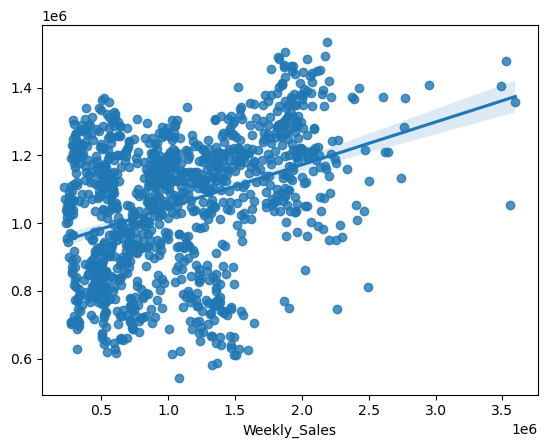

In [88]:
sns.regplot(y_test, y_pred)

These do not show a very clear linear relationship between the two

In [89]:
# Now, we plot out residuals = y_test - y_pred 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

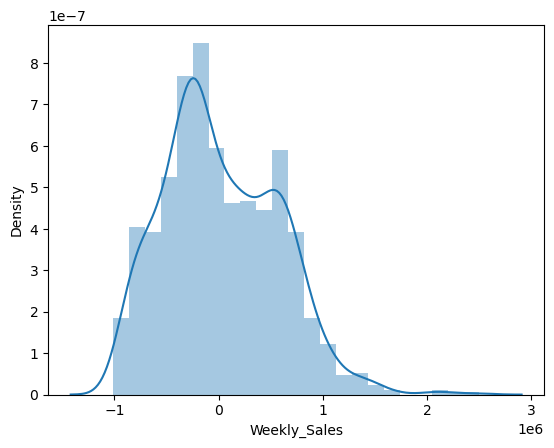

In [90]:
sns.distplot((y_test-y_pred))

Here, the residuals are not normally distributed. Now, we check on the metrics that help evaluate the efficacy of the model. 

In [91]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [92]:
MAE = metrics.mean_absolute_error(y_test, y_pred).round(2)

In [93]:
MSE = metrics.mean_squared_error(y_test,y_pred).round(2)

In [94]:
RMSE = np.sqrt(MSE).round(2)

In [95]:
R_squared = r2_score(y_test,y_pred).round(5)*100


In [96]:
R_squared

13.499

The following are the evaluation metrics of this model 



In [97]:
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('R_Squared/Accuracy: {}%'.format(R_squared))

MAE: 452717.73
MSE: 303844155549.12
RMSE: 551220.61
R_Squared/Accuracy: 13.499%


## Decision Tree model

In [98]:
sales_data

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day,Month,Year
0,1,2010-05-02,0,42.31,2.572,211.096358,8.106,1643690.90,2,5,2010
1,1,2010-12-02,1,38.51,2.548,211.242170,8.106,1641957.44,2,12,2010
2,1,2010-02-19,0,39.93,2.514,211.289143,8.106,1611968.17,19,2,2010
3,1,2010-02-26,0,46.63,2.561,211.319643,8.106,1409727.59,26,2,2010
4,1,2010-05-03,0,46.50,2.625,211.350143,8.106,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,0,64.88,3.997,192.013558,8.684,713173.95,28,9,2012
6431,45,2012-05-10,0,64.89,3.985,192.170412,8.667,733455.07,10,5,2012
6432,45,2012-12-10,0,54.47,4.000,192.327265,8.667,734464.36,10,12,2012
6433,45,2012-10-19,0,56.47,3.969,192.330854,8.667,718125.53,19,10,2012


In [99]:
#importing relevant libraries 

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dr = DecisionTreeRegressor()

In [102]:
dr.fit(X_train,y_train)

DecisionTreeRegressor()

In [103]:
#predicting the test results

In [104]:
y_pred_dr = dr.predict(X_test)

In [105]:
y_pred_dr

array([1615494.14, 1316385.43,  532739.77, ..., 1440963.  , 1902762.5 ,
        762184.1 ])

In [106]:
#comparing the predicted weekly sales (y_pred_dr) to the actual weekly sales(y_test)

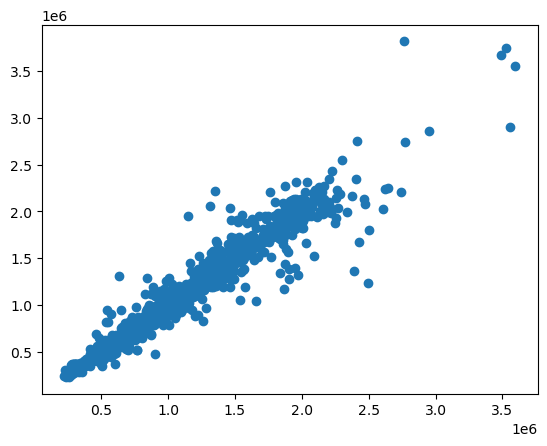

In [107]:
plt.scatter(y_test,y_pred_dr)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

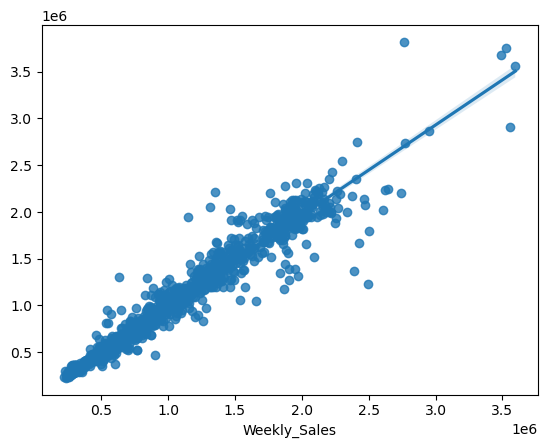

In [108]:
sns.regplot(y_test, y_pred_dr)

There seems to be some linear relationship between the two

In [109]:
# Now, we plot out residuals = y_test - y_pred_dr

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

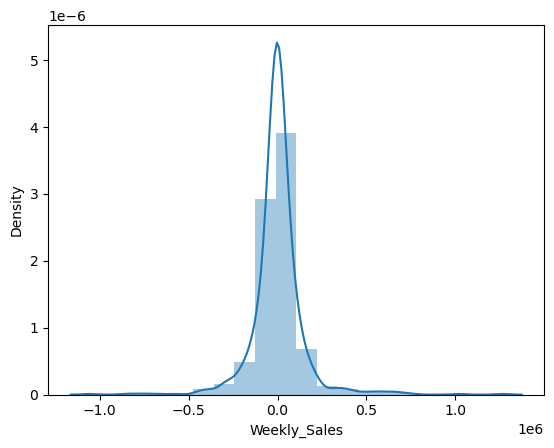

In [110]:
sns.distplot((y_test- y_pred_dr), bins=20)

The residuals seem to be normally distributed, which shows 
that the model has predicted the weekly sales 
value very close to the actual
weekly sales value 

In [111]:
#Evaluating the model using metrics 


In [112]:
MAE_dr = metrics.mean_absolute_error(y_test, y_pred_dr).round(2)

In [113]:
MSE_dr  = metrics.mean_squared_error(y_test, y_pred_dr).round(2)

In [114]:
RMSE_dr = np.sqrt(MSE_dr).round(2)

In [115]:
R_squared_dr = r2_score(y_test,y_pred_dr).round(5)*100

The following are the evaluation metrics of this model 



In [116]:
print('MAE: {}'.format(MAE_dr))
print('MSE: {}'.format(MSE_dr))
print('RMSE: {}'.format(RMSE_dr))
print('R_Squared/Accuracy: {}%'.format(R_squared_dr))

MAE: 82757.96
MSE: 21332294165.22
RMSE: 146055.79
R_Squared/Accuracy: 93.927%


## Random Forest model

In [117]:
#importing relevant libraries

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rfr= RandomForestRegressor()

In [120]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [121]:
#predicting the test results


In [122]:
y_pred_rfr = rfr.predict(X_test)

In [123]:
y_pred_rfr

array([1764764.9105, 1287552.0084,  582472.5253, ..., 1705451.2362,
       2057544.4479,  824554.3576])

In [124]:
#comparing the predicted weekly sales (y_pred_rfr) to the actual weekly sales(y_test)

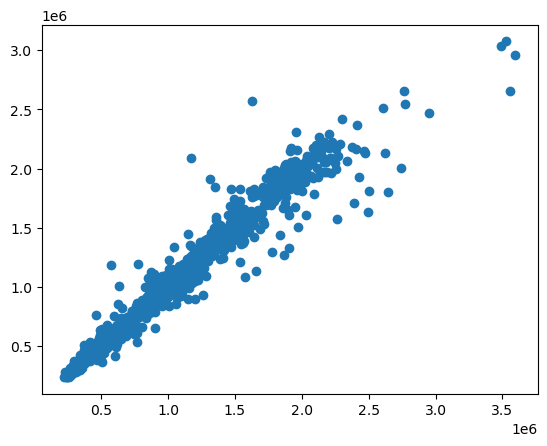

In [125]:
plt.scatter(y_test,y_pred_rfr)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Weekly_Sales'>

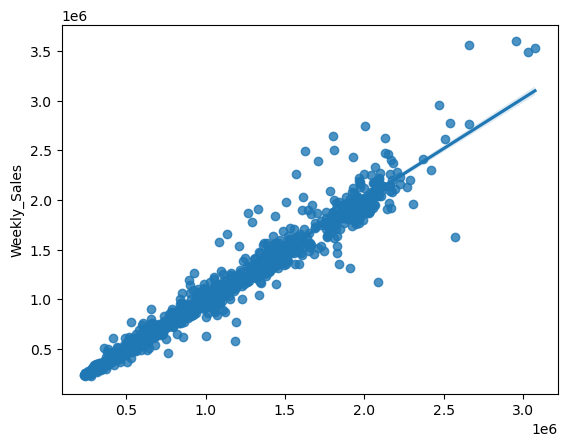

In [126]:
sns.regplot(y_pred_rfr, y_test)

In [127]:
# Now, we plot out residuals = y_test - y_pred_rfr

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

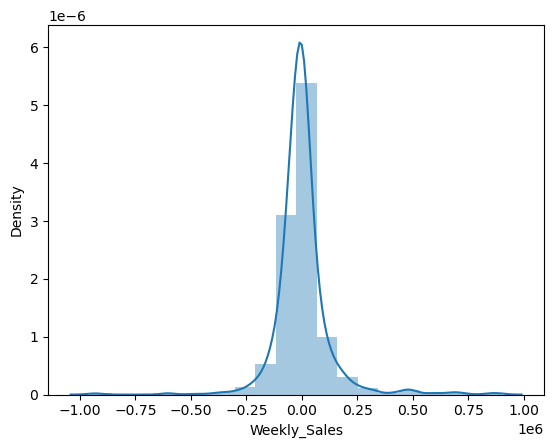

In [128]:
sns.distplot((y_test- y_pred_rfr), bins=20)

The residuals seem to be normally distributed, which shows 
that the model has predicted the weekly sales 
value very close to the actual
weekly sales value 

In [129]:
#Evaluating the model using metrics 

In [130]:
MAE_rfr = metrics.mean_absolute_error(y_test, y_pred_rfr).round(2)
MSE_rfr  = metrics.mean_squared_error(y_test, y_pred_rfr).round(2)
RMSE_rfr = np.sqrt(MSE_rfr).round(2)
R_squared_rfr = rfr.score(X_test,y_test).round(3)*100

In [131]:
print('The following are the evaluation metrics of this model ')
print('MAE: {}'.format(MAE_rfr))
print('MSE: {}'.format(MSE_rfr))
print('RMSE: {}'.format(RMSE_rfr))
print('R_Squared: {}%'.format(R_squared_rfr))

The following are the evaluation metrics of this model 
MAE: 70169.42
MSE: 16145299782.08
RMSE: 127064.16
R_Squared: 95.39999999999999%


## Cross-validation 

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
# Linear Regression

lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score: {}%".format(lr_scores.mean()*100))

[0.11630255 0.09528173 0.12797371 0.14953379 0.10570268 0.12332464
 0.105908   0.07492712 0.1686265  0.1394762 ]
Mean Score: 12.070569219874123%


In [134]:
# Decision Tree Regression

dr_scores = cross_val_score(dr, X_train, y_train, cv=10, scoring='r2')
print(dr_scores)
print("Mean Score: {}%".format(dr_scores.mean()*100))

[0.92343673 0.91191126 0.90045245 0.90157086 0.92287777 0.93916886
 0.8604033  0.898534   0.89878841 0.87978195]
Mean Score: 90.36925587479325%


In [135]:
# Random Forest Regression

rfr_scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='r2')
print(rfr_scores)
print("Mean Score: {}%".format(rfr_scores.mean()*100))

[0.93623908 0.94597731 0.94447565 0.94714635 0.94165112 0.94904007
 0.94827321 0.9378401  0.94069839 0.94634296]
Mean Score: 94.37684245639781%


## Conclusion

We therefore conclude that out of all the three models used to predict the weekly sales of Walmart, 
Linear Regresssion is the least accurate to predict sales with an accuracy of merely 10%. On the other hand,
both Decision Trees and Random Forest algorithms predict the weekly sales accurately where Random Forest Regression
is the most accurate with an accuracy of almost 95%. Thus, it is th best model to forecast weekly sales. 